# Analysis

This notebook performs visual analysis on the final data with frame labels to answer the research questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('final.csv')

## RQ1

First, the data is sorted by publish year. The frames used are then counted separately.

A line plot is drawn using the matplotlib.pyplot package. Documentations can be seen on https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

In [3]:
# Sort the data by 'Publish Year'
data = data.sort_values(by='Publish Year')

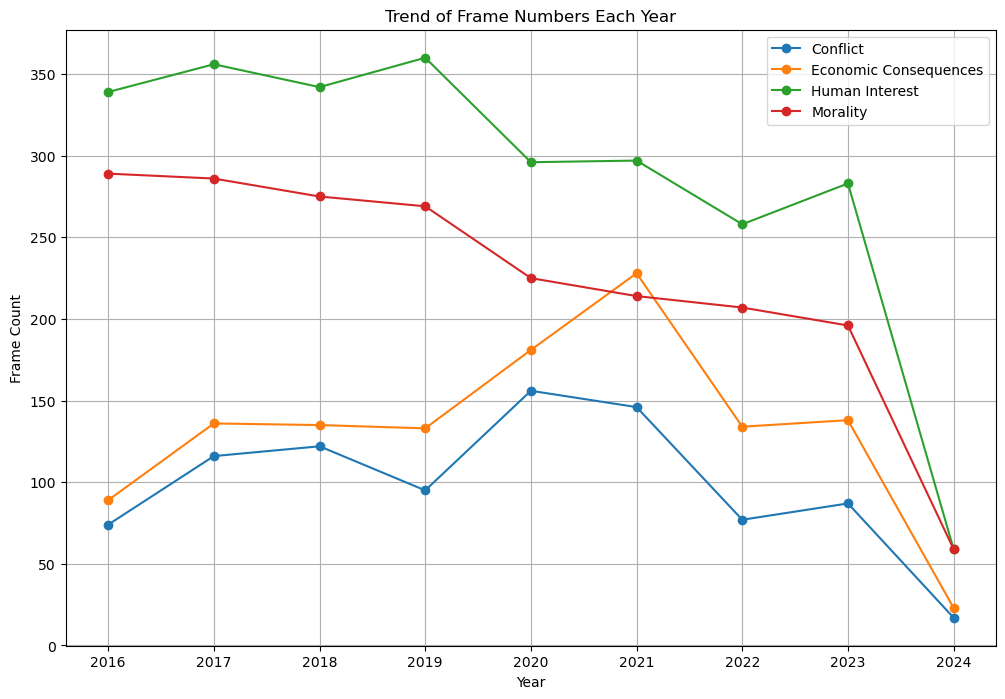

In [4]:
# Group by 'Publish Year' and sum the values of each frame separately
frames_count_per_year = data.groupby('Publish Year')[['Conflict', 'Economic Consequences', 'Human Interest', 'Morality']].sum().reset_index()

# Plotting the trend of each frame count per year
plt.figure(figsize=(12, 8))

plt.plot(frames_count_per_year['Publish Year'], frames_count_per_year['Conflict'], marker='o', label='Conflict')
plt.plot(frames_count_per_year['Publish Year'], frames_count_per_year['Economic Consequences'], marker='o', label='Economic Consequences')
plt.plot(frames_count_per_year['Publish Year'], frames_count_per_year['Human Interest'], marker='o', label='Human Interest')
plt.plot(frames_count_per_year['Publish Year'], frames_count_per_year['Morality'], marker='o', label='Morality')

plt.title('Trend of Frame Numbers Each Year')
plt.xlabel('Year')
plt.ylabel('Frame Count')
plt.legend()
plt.grid(True)
plt.show()


Proportion of Frames per Year:

The proportions are calculated using the div function, where each frame is divided by the total count of the frame that year.

A horizontal bar plot is drawn, one stacked, one unstacked. Documentations can be found on https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html.

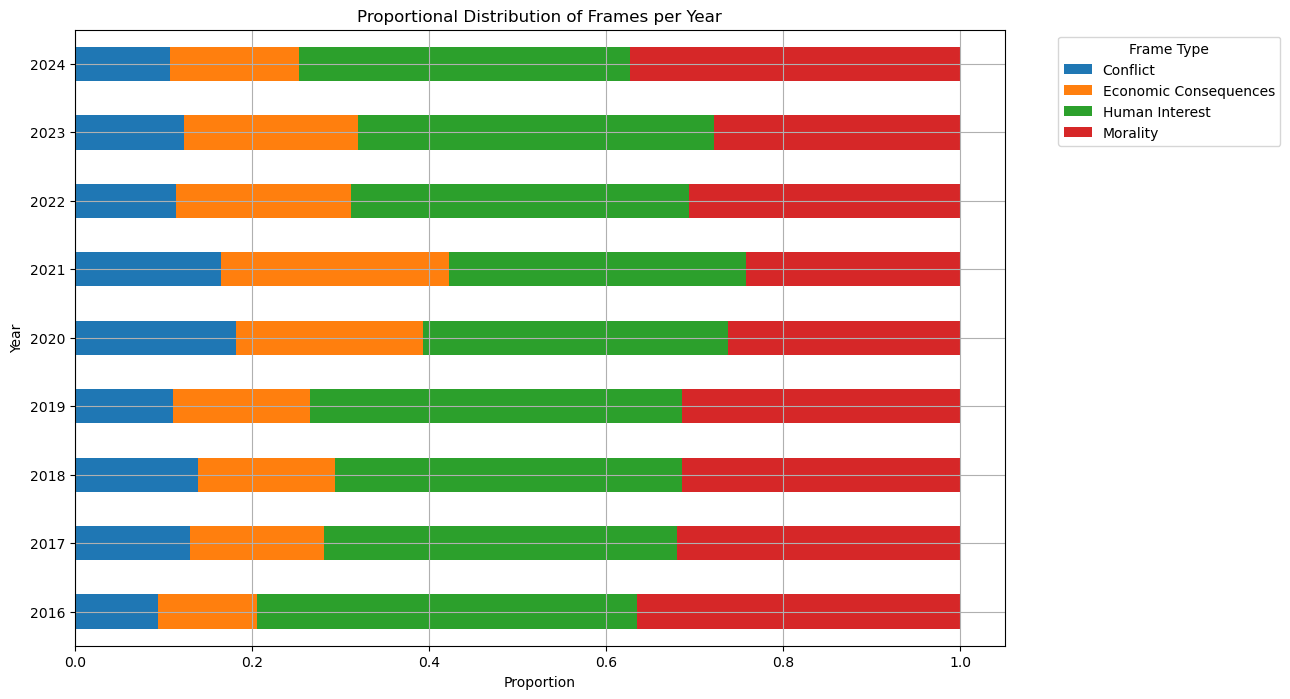

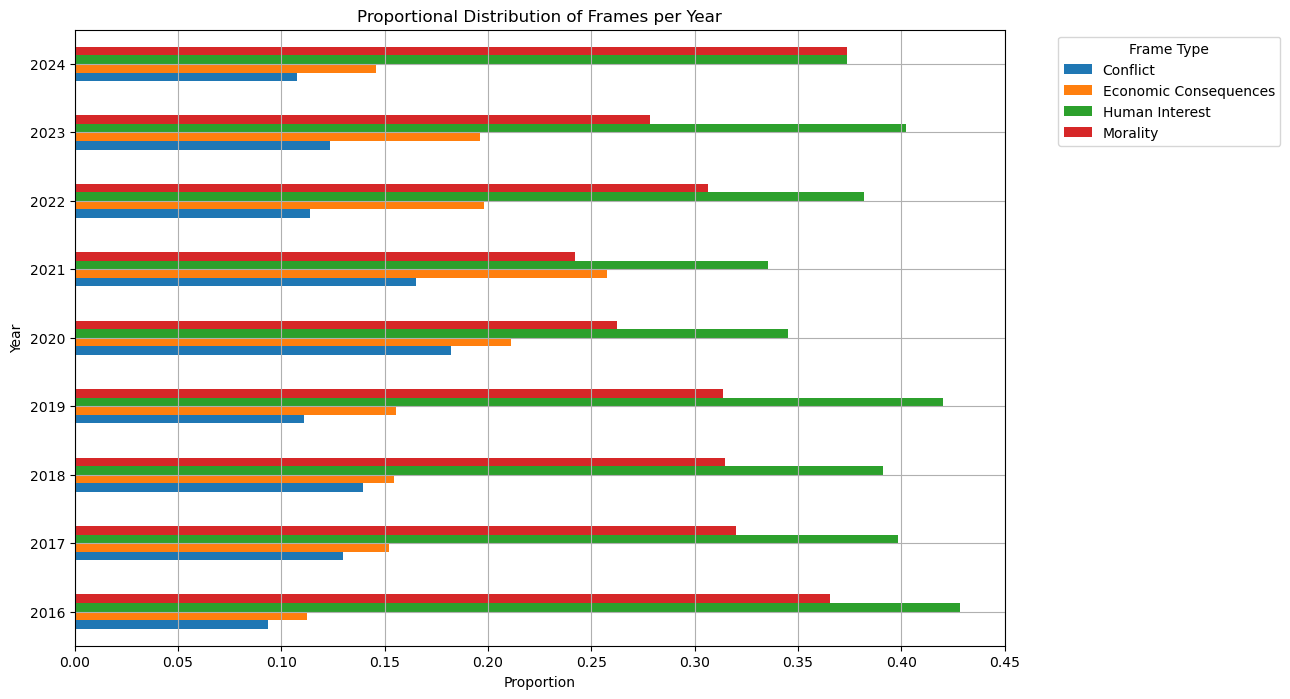

In [5]:
frames_sum_per_year = data.groupby('Publish Year')[['Conflict', 'Economic Consequences', 'Human Interest', 'Morality']].sum()
frames_proportion_per_year = frames_sum_per_year.div(frames_sum_per_year.sum(axis=1), axis=0).reset_index()

# Plotting proportional distribution of frames per year with horizontal bars
frames_proportion_per_year.plot(kind='barh', x='Publish Year', stacked=True, figsize=(12, 8))
plt.title('Proportional Distribution of Frames per Year')
plt.xlabel('Proportion')
plt.ylabel('Year')
plt.legend(title='Frame Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plotting proportional distribution of frames per year with horizontal bars
frames_proportion_per_year.plot(kind='barh', x='Publish Year', figsize=(12, 8))
plt.title('Proportional Distribution of Frames per Year')
plt.xlabel('Proportion')
plt.ylabel('Year')
plt.legend(title='Frame Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## RQ2

A correlation matrix is first calculated between the four frames. Hereafter, a heatmap of the correlations between frames are drawn for visualisation. Here, the matshow function is used to Display a 2D array as a matrix in a new figure window. Documentations can be found in https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html.

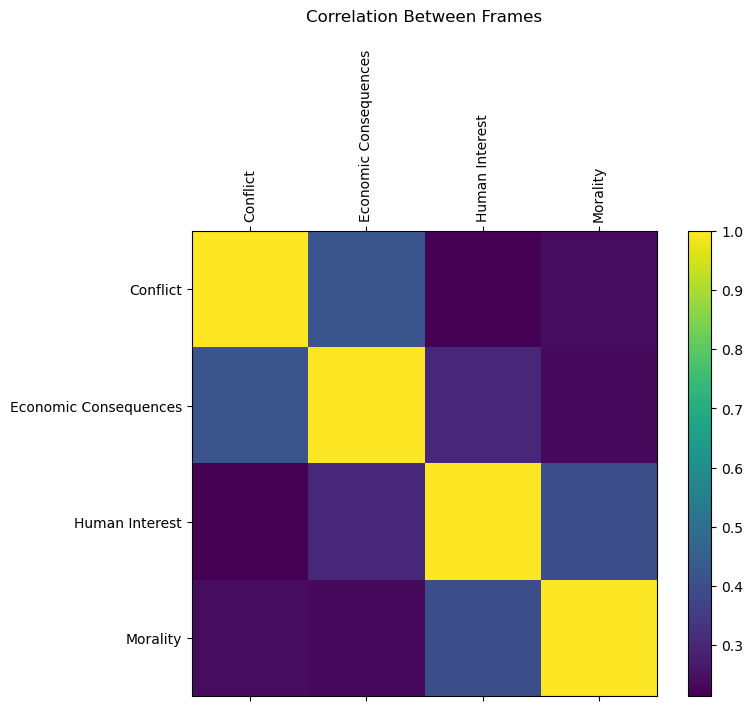

In [6]:
correlation_matrix = data[['Conflict', 'Economic Consequences', 'Human Interest', 'Morality']].corr()

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Between Frames', pad=20)
plt.show()

## RQ3

The code first calculates the frame counts per channel to find the channels with the most frame count. Hereafter, the top 15 channels are selected, and the frame counts that the channels used are displayed in a bar plot. The documentation can be found in https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html.

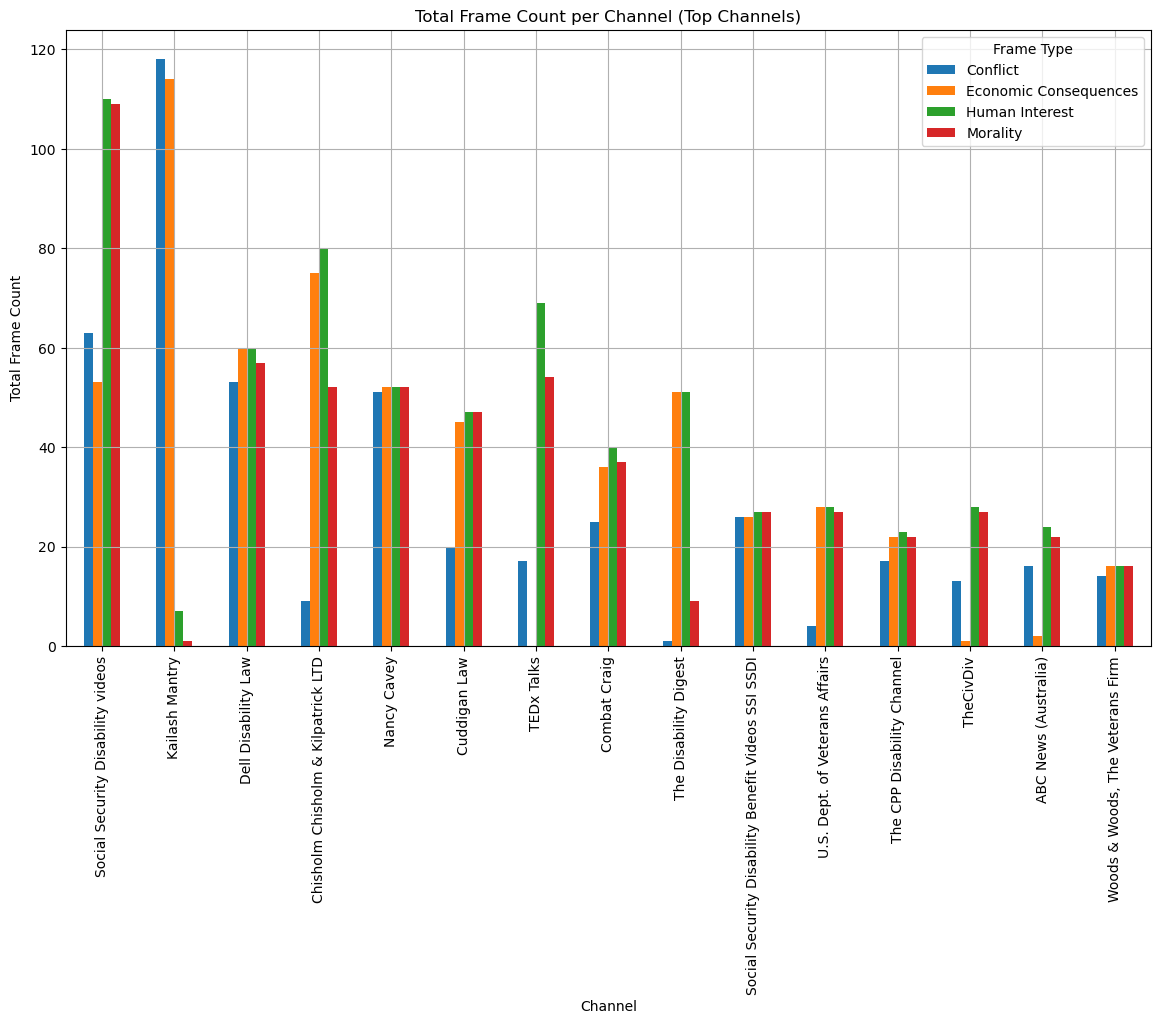

In [7]:
# Calculate the total frame count per channel
total_frame_count_per_channel = data.groupby('Channel')[['Conflict', 'Economic Consequences', 'Human Interest', 'Morality']].sum().reset_index()

# Sort channels by total frame count and select the top channels to the extent that it is readable
total_frame_count_per_channel['Total'] = total_frame_count_per_channel[['Conflict', 'Economic Consequences', 'Human Interest', 'Morality']].sum(axis=1)
top_total_frame_channels = total_frame_count_per_channel.sort_values(by='Total', ascending=False).head(15)

# Plotting total frame count per channel for the top channels
top_total_frame_channels.plot(kind='bar', figsize=(14, 8), x='Channel', y=['Conflict', 'Economic Consequences', 'Human Interest', 'Morality'])
plt.title('Total Frame Count per Channel (Top Channels)')
plt.xlabel('Channel')
plt.ylabel('Total Frame Count')
plt.legend(title='Frame Type')
plt.grid(True)
plt.show()